In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
import pandas as pd

# Load the dataset (replace 'path_to_file' with the actual path or URL)
data = pd.read_csv('/content/diabetes.csv')

print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB
None

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66  

In [3]:
data.shape

(769, 9)

In [4]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
                                                                                                            ..
0            84       64             22             66       35.8  0.545                     21   0          1
             78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
             73       0              0              0        21.1  0.342                     25   0          1
             67       76             0              0        45.3  0.194                     46   0          1
Name: count, Length: 769, dtype: int64

In [8]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# **Logistic** **Regression**

In [11]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/diabetes.csv")



In [13]:
# Encode categorical features
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].median())


In [15]:
# Define features (X) and target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']


In [17]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [20]:
 #Make predictions
y_pred = logistic_model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [22]:
# Print results
print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


=== Logistic Regression ===
Accuracy: 0.7142857142857143
Confusion Matrix:
[[80 20]
 [24 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



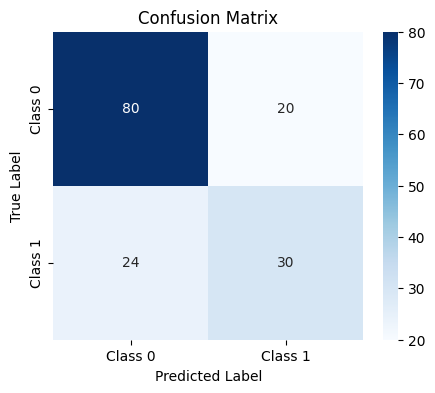

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train = np.random.rand(100, 13)
y_train = np.random.randint(0, 2, size=100)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
input_data = (59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_scaled = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_scaled)
if prediction[0] == 0:
    print("The person does not have a diabetes")
else:
    print("The person has diabetes.")


The person has diabetes.


# **Perceptron**


In [26]:

# Define features (X) and target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']


In [27]:
# Standardize numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
# Train Perceptron model
perceptron_model = Perceptron(random_state=42, max_iter=1000)
perceptron_model.fit(X_train, y_train)


Perceptron(random_state=42)

In [30]:
# Make predictions
y_pred = perceptron_model.predict(X_test)


In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [32]:
# Print results
print("=== Perceptron ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

=== Perceptron ===
Accuracy: 0.564935064935065
Confusion Matrix:
[[39 61]
 [ 6 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.39      0.54       100
           1       0.44      0.89      0.59        54

    accuracy                           0.56       154
   macro avg       0.65      0.64      0.56       154
weighted avg       0.72      0.56      0.56       154



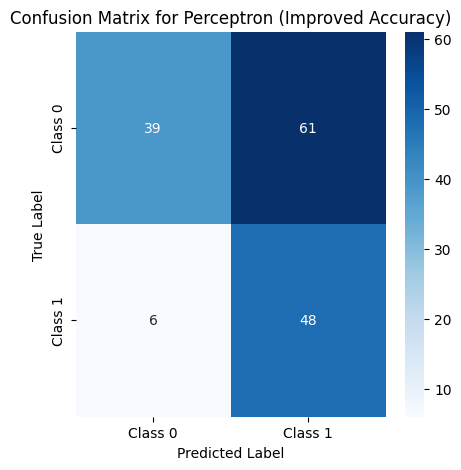

In [33]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix for Perceptron (Improved Accuracy)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test, y_pred))


accuracy 0.7077922077922078


In [35]:
print("\nModel Evaluation:")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.58      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



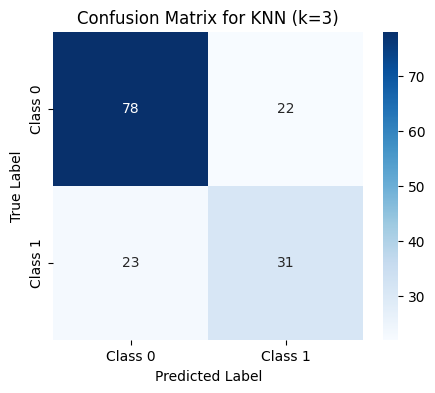

In [36]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix for KNN (k={k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize k-values and scores
k_values = range(1, 10)
knn_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    score = cross_val_score(knn_classifier, X_scaled, y, cv=3)  # 3-fold cross-validation
    knn_scores.append(score.mean())

print("KNN scores for different k-values:", knn_scores)





KNN scores for different k-values: [np.float64(0.9466666666666667), np.float64(0.9266666666666666), np.float64(0.94), np.float64(0.9533333333333333), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.9533333333333333), np.float64(0.9533333333333333)]


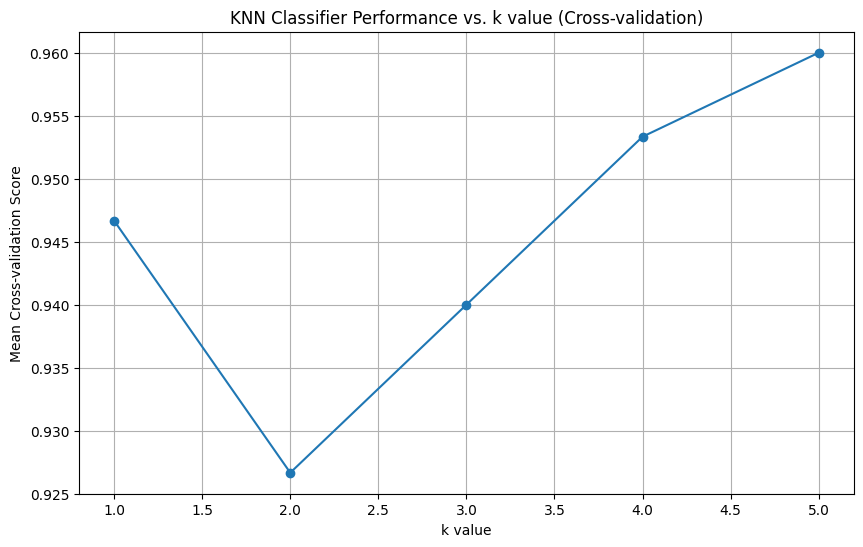

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Use a reduced range for k values
k_values = range(1, 6)  # Try k values from 1 to 5
knn_scores = []

# Use 3-fold cross-validation for quicker execution
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')  # Faster algorithm
    score = cross_val_score(knn_classifier, X_scaled, y, cv=3)  # 3-fold cross-validation
    knn_scores.append(score.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, marker='o')
plt.title('KNN Classifier Performance vs. k value (Cross-validation)')
plt.xlabel('k value')
plt.ylabel('Mean Cross-validation Score')
plt.grid(True)
plt.show()


In [39]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("=== K-Nearest Neighbors (KNN) ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

=== K-Nearest Neighbors (KNN) ===
Accuracy: 0.7077922077922078
Confusion Matrix:
[[78 22]
 [23 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.58      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



# **SVM**

In [40]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7597402597402597


In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



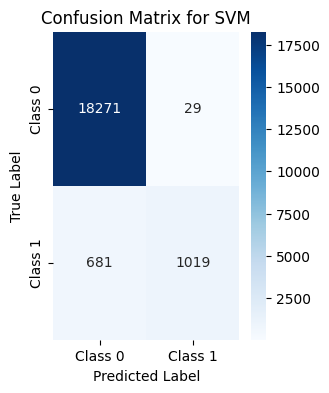

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()